In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading the breast cancer dataset from sklearn datasets

cancer = load_breast_cancer()

print("The feature names are: \n \n", cancer.feature_names)
print("\nNumber of features: {}". format(len(cancer.feature_names)))
print("\n\nThe classes of data: \n", cancer.target_names)
print("\n\nSample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

The feature names are: 
 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Number of features: 30


The classes of data: 
 ['malignant' 'benign']


Sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [6]:
original_features=cancer.data
labels=cancer.target

print("The shape of the attributes data: \n", original_features.shape)
print(pd.DataFrame(original_features).iloc[:, :30].describe().loc[['mean', 'std']].round(2))

The shape of the attributes data: 
 (569, 30)
         0      1      2       3     4     5     6     7     8     9   ...  \
mean  14.13  19.29  91.97  654.89  0.10  0.10  0.09  0.05  0.18  0.06  ...   
std    3.52   4.30  24.30  351.91  0.01  0.05  0.08  0.04  0.03  0.01  ...   

         20     21      22      23    24    25    26    27    28    29  
mean  16.27  25.68  107.26  880.58  0.13  0.25  0.27  0.11  0.29  0.08  
std    4.83   6.15   33.60  569.36  0.02  0.16  0.21  0.07  0.06  0.02  

[2 rows x 30 columns]


In [7]:
# PCA step 1:
scaler_op=StandardScaler() #  Making each feature zero mean and unit variance

scaled_data=scaler_op.fit_transform(original_features)

print(pd.DataFrame(scaled_data).iloc[:, :30].describe().loc[['mean', 'std']].round(0))

       0    1    2    3    4    5    6    7    8    9   ...   20   21   22  \
mean -0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0 -0.0 -0.0  ... -0.0  0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

       23   24   25   26   27   28   29  
mean  0.0 -0.0 -0.0  0.0 -0.0 -0.0  0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 30 columns]


In [17]:
pca = PCA(n_components=6)  #keep the principal components of the data

# Steps 2 + 3 + 4
# Step 2: Compute Correlation matrix
# Step 3: Compute eigenvectors
# Step 4: Select principal components

pca.fit(scaled_data) #fit PCA model to cancer data

# Steps 5 : Project data onto the principal components
pca_features = pca.transform(scaled_data)

print("Number of features before PCA: {}".format(str(original_features.shape[1])))
print("Number of features after PCA: {}".format(str(pca_features.shape[1])))

Number of features before PCA: 30
Number of features after PCA: 6


In [19]:
principal_components = pca.components_
eigenvalues = pca.explained_variance_

for i, vector in enumerate(principal_components, start=1):
    print(f"Principal Component {i}:")
    # Join each float formatted to 3 decimals into one space-separated string
    print(" ".join(f"{v:.3f}" for v in vector))
    print()

print("Eigenvalues:")
for i, val in enumerate(eigenvalues, start=1):
    print(f"Component {i} eigenvalue: {val:.3f}")

Principal Component 1:
0.219 0.104 0.228 0.221 0.143 0.239 0.258 0.261 0.138 0.064 0.206 0.017 0.211 0.203 0.015 0.170 0.154 0.183 0.042 0.103 0.228 0.104 0.237 0.225 0.128 0.210 0.229 0.251 0.123 0.132

Principal Component 2:
-0.234 -0.060 -0.215 -0.231 0.186 0.152 0.060 -0.035 0.190 0.367 -0.106 0.090 -0.089 -0.152 0.204 0.233 0.197 0.130 0.184 0.280 -0.220 -0.045 -0.200 -0.219 0.172 0.144 0.098 -0.008 0.142 0.275

Principal Component 3:
-0.009 0.065 -0.009 0.029 -0.104 -0.074 0.003 -0.026 -0.040 -0.023 0.268 0.375 0.267 0.216 0.309 0.155 0.176 0.225 0.289 0.212 -0.048 -0.042 -0.049 -0.012 -0.260 -0.236 -0.173 -0.170 -0.271 -0.233

Principal Component 4:
-0.041 0.603 -0.042 -0.053 -0.159 -0.032 -0.019 -0.065 -0.067 -0.049 -0.098 0.360 -0.089 -0.108 -0.045 0.027 -0.001 -0.074 -0.044 -0.015 -0.015 0.633 -0.014 -0.026 -0.018 0.091 0.074 -0.006 0.036 0.077

Principal Component 5:
-0.038 0.049 -0.037 -0.010 0.365 -0.012 -0.086 0.044 0.306 0.044 0.154 0.192 0.121 0.128 0.232 -0.280 -0.354 

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522]


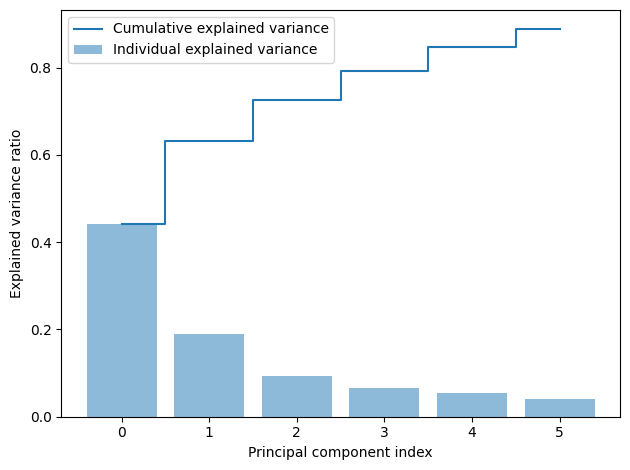

In [18]:

#Analysis of the PCA
vars=pca.explained_variance_
#array of values where each value equals the variance of each principal component

var_ratio=pca.explained_variance_ratio_
#array of values where each value is the
#percentage of variance explained by each of the selected components

print(var_ratio)
cum_sum_eigenvalues = np.cumsum(var_ratio)

plt.bar(range(0,len(var_ratio)), var_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()